In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pylab as plt

import astropy.io.fits as fits

import glob

import os

from photutils.aperture import EllipticalAperture
from photutils.aperture import EllipticalAnnulus
from photutils import aperture_photometry

from matplotlib.colors import LogNorm

# Starting with M101:

In [2]:
# filepath just for M101 observations:

filepath = glob.glob('./fits/ARCSAT/5-19/NGC*.fits')

In [4]:
# getting copies of data and headers for M49; prints filenames as well as headers for first two:

data_array = []
header_array = []

for file in filepath:

    hdu = fits.open(file)
    data_array.append(hdu[0].data.copy())
    header_array.append(hdu[0].header.copy())
    print(os.path.basename(file))

hdu.close()

NGC4214_halpha_20180520_054547.fits
NGC4214_sdss_g_20180520_045658.fits
NGC4214_sdss_g_20180520_050153.fits
NGC4214_sdss_i_20180520_052023.fits
NGC4214_sdss_r_20180520_051051.fits
NGC4214_sdss_z_20180520_053032.fits


In [5]:
plt.style.use('default')

In [6]:
# lazy image reduction:

crude_i = data_array[3]-np.mean(data_array[3])
crude_r = data_array[4]-np.mean(data_array[4])
crude_g = data_array[2]-np.mean(data_array[2])

In [7]:
from astropy.visualization import make_lupton_rgb

In [20]:
color_image = make_lupton_rgb(crude_r, crude_g, crude_i, stretch=800)

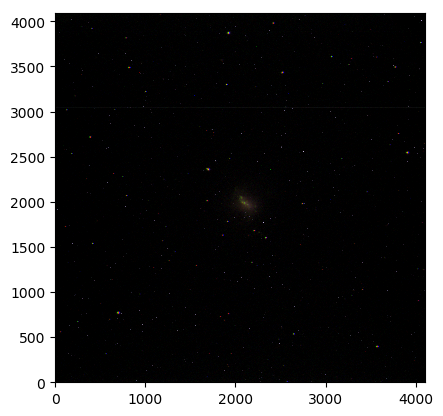

In [21]:
plt.imshow(color_image, norm=LogNorm(vmin=500), origin='lower', cmap='rainbow');

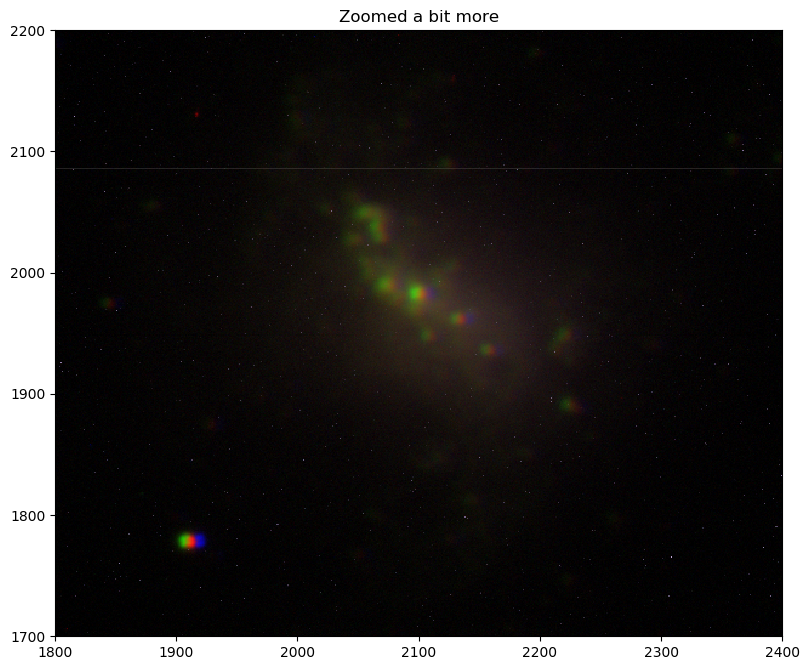

In [22]:
fig, ax = plt.subplots(1,1)

fig.set_size_inches(8,8)

fig.tight_layout()

ax.axis((1800,2400,1700,2200))

ax.imshow(color_image, norm=LogNorm(vmin=200), origin='lower', cmap='rainbow')
ax.set_title('Zoomed a bit more');

# Okay now to actually import the biases and flats:

In [23]:
# Night 2 Bias Filepath:

filepath2 = glob.glob('./fits/ARCSAT/5-19/Bias*.fits')

In [24]:
# Retrieves night 2 bias stuff; prints filenames & returns avg. bias count.

biasdata_array = []
biasheader_array = []
bias_avgs = []
superbias = []

for file in filepath2:

    hdu1 = fits.open(file)
    biasdata_array.append(hdu1[0].data.copy())
    biasheader_array.append(hdu1[0].header.copy())
    print(os.path.basename(file))
    bdata = fits.getdata(file)
    bias_avgs.append(np.mean(bdata))

super_bias = np.mean(bias_avgs)

hdu1.close()
print(super_bias)

Bias_BIN1_20180520_082435.fits
Bias_BIN1_20180520_082510.fits
Bias_BIN1_20180520_082533.fits
Bias_BIN1_20180520_082555.fits
Bias_BIN1_20180520_082622.fits
1131.0744609951973


In [25]:
# Filepath for night 1 dome flats.

filepath3 = glob.glob('./fits/ARCSAT/5-19/domeflat*.fits')

In [26]:
# Getting dome flat stuff:

domeflatdata_array = []
domeflatheader_array = []

for file in filepath3:

    hdu2 = fits.open(file)
    domeflatdata_array.append(hdu2[0].data.copy())
    domeflatheader_array.append(hdu2[0].header.copy())
    print(os.path.basename(file))

hdu2.close()

domeflat_halpha_001.fits
domeflat_sdss_g_001-2.fits
domeflat_sdss_g_002-2.fits
domeflat_sdss_g_003-2.fits
domeflat_sdss_i_001.fits
domeflat_sdss_i_002.fits
domeflat_sdss_i_003.fits
domeflat_sdss_r_001.fits
domeflat_sdss_r_002.fits
domeflat_sdss_r_003.fits
domeflat_sdss_z_001.fits


In [27]:
# sdss_i avg. flat count:

iflat_avg = np.mean(domeflatdata_array[4:7])
print(iflat_avg)

19478.75809923808


# Now for actual data reduction (of NGC 4214):

In [28]:
# subtract biases - from everything,
# divide flats

In [29]:
from sklearn.preprocessing import normalize

In [30]:
# making average i band flat:

i_avg_flats = (domeflatdata_array[4] + domeflatdata_array[5] + domeflatdata_array[6])/3

In [31]:
i_avg_flats_minusbias = i_avg_flats - super_bias

In [32]:
# normalizing i band flat:

n2_domeflatnorm_i = i_avg_flats_minusbias/np.linalg.norm(i_avg_flats_minusbias)

In [33]:
reduced_i_NGC4214 = (data_array[3] - super_bias)/(n2_domeflatnorm_i)

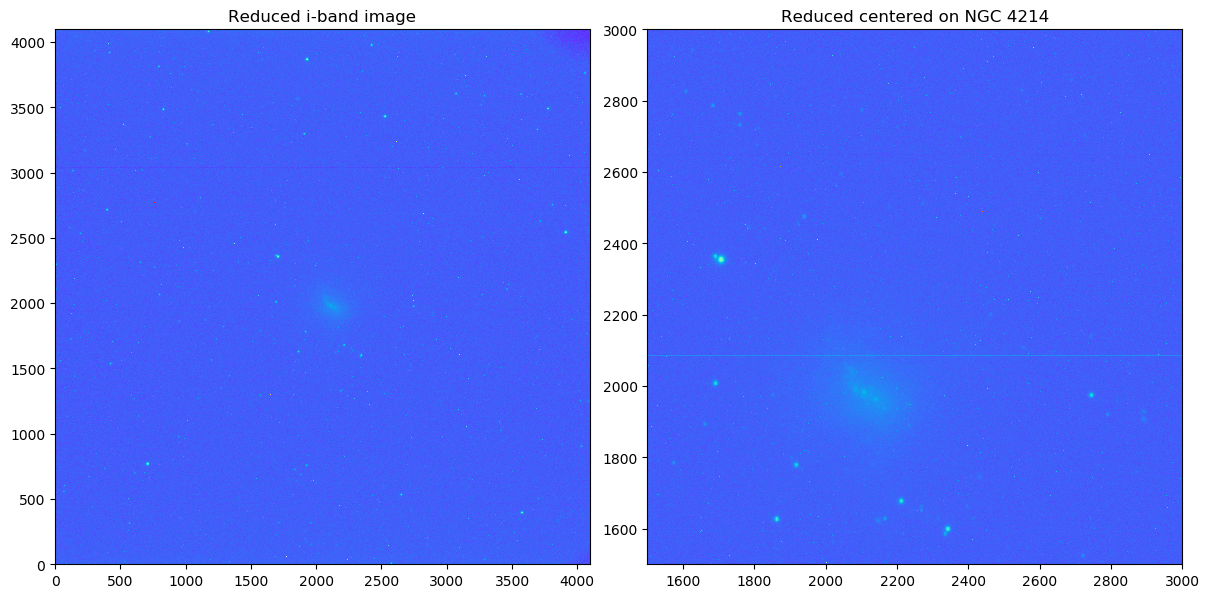

In [34]:
fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,6)

fig.tight_layout()

ax[1].axis((1500,3000,1500,3000))

ax[0].imshow(reduced_i_NGC4214, norm=LogNorm(), origin='lower', cmap='rainbow')
ax[1].imshow(reduced_i_NGC4214, norm=LogNorm(), origin='lower', cmap='rainbow')

ax[0].set_title('Reduced i-band image')
ax[1].set_title('Reduced centered on NGC 4214');

In [35]:
r_avg_flats = (domeflatdata_array[7] + domeflatdata_array[8] + domeflatdata_array[9])/3

In [36]:
rflat_minusbias = r_avg_flats - super_bias

In [37]:
n2_domeflatnorm_r = rflat_minusbias/np.linalg.norm(rflat_minusbias)

In [40]:
reduced_r_NGC4214 = (data_array[4] - super_bias)/(n2_domeflatnorm_r)

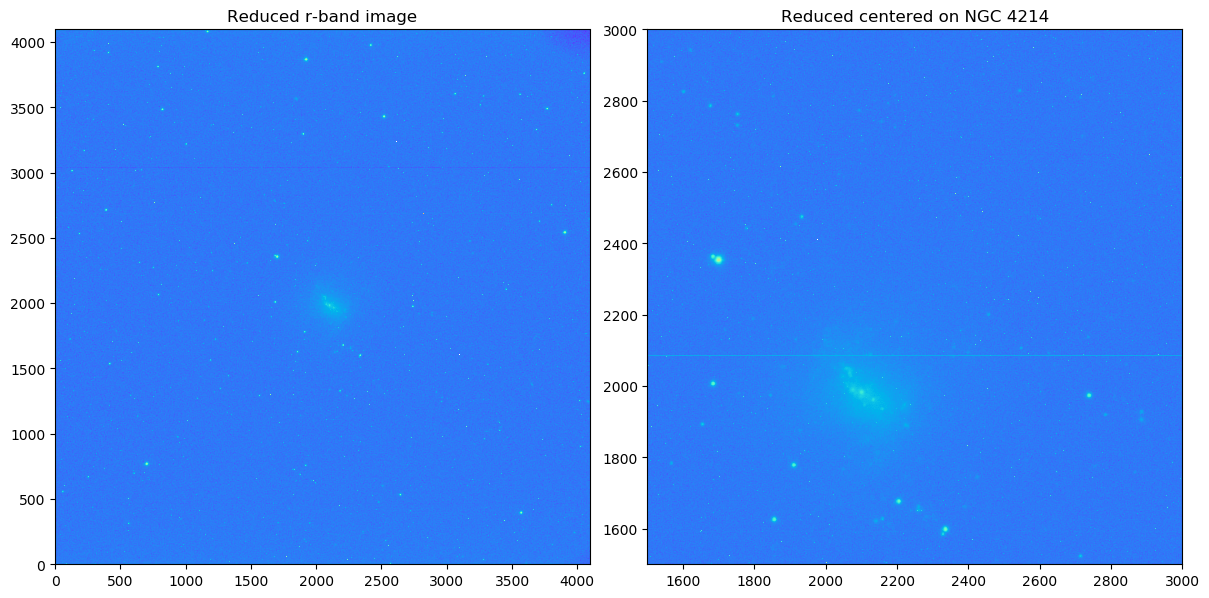

In [41]:
fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,6)

fig.tight_layout()

ax[1].axis((1500,3000,1500,3000))

ax[0].imshow(reduced_r_NGC4214, norm=LogNorm(), origin='lower', cmap='rainbow')
ax[1].imshow(reduced_r_NGC4214, norm=LogNorm(), origin='lower', cmap='rainbow')

ax[0].set_title('Reduced r-band image')
ax[1].set_title('Reduced centered on NGC 4214');

In [42]:
# g band

g_avg_flats_minusbias = ((domeflatdata_array[1] + domeflatdata_array[2] + domeflatdata_array[3])/3) - super_bias

n2_domeflatnorm_g = g_avg_flats_minusbias/np.linalg.norm(g_avg_flats_minusbias)

reduced_g_NGC4214 = (data_array[2] - super_bias)/(n2_domeflatnorm_g)

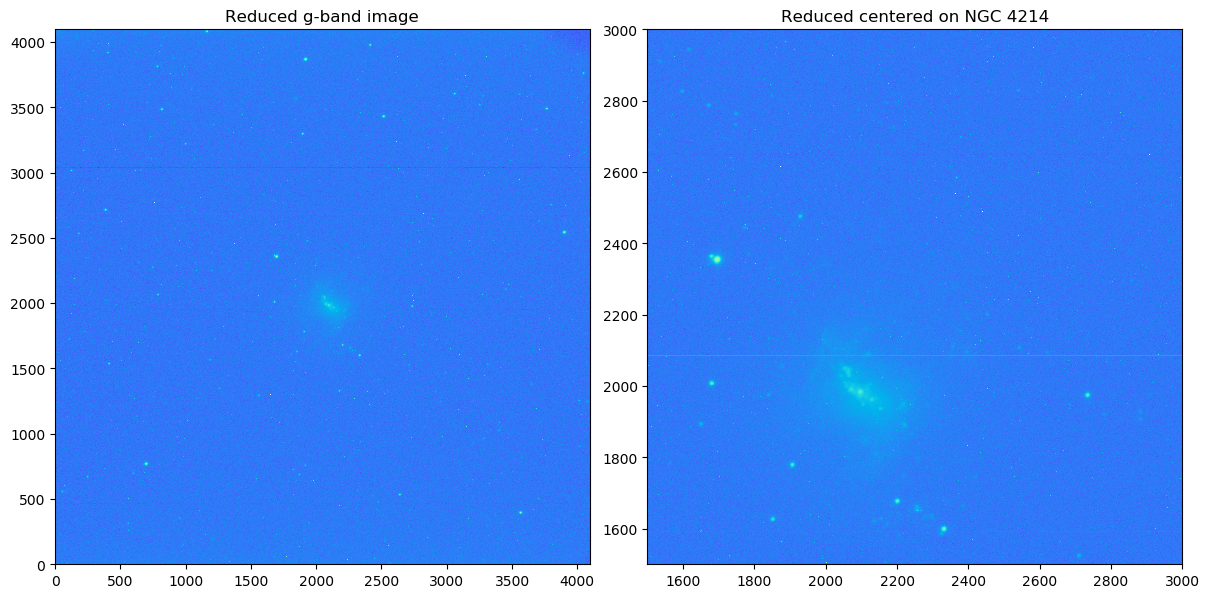

In [44]:
fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,6)

fig.tight_layout()

ax[1].axis((1500,3000,1500,3000))

ax[0].imshow(reduced_g_NGC4214, norm=LogNorm(), origin='lower', cmap='rainbow')
ax[1].imshow(reduced_g_NGC4214, norm=LogNorm(), origin='lower', cmap='rainbow')

ax[0].set_title('Reduced g-band image')
ax[1].set_title('Reduced centered on NGC 4214');

In [46]:
# z band

z_avg_flats_minusbias = domeflatdata_array[10] - super_bias

n2_domeflatnorm_z = z_avg_flats_minusbias/np.linalg.norm(z_avg_flats_minusbias)

reduced_z_NGC4214 = (data_array[5] - super_bias)/(n2_domeflatnorm_z)

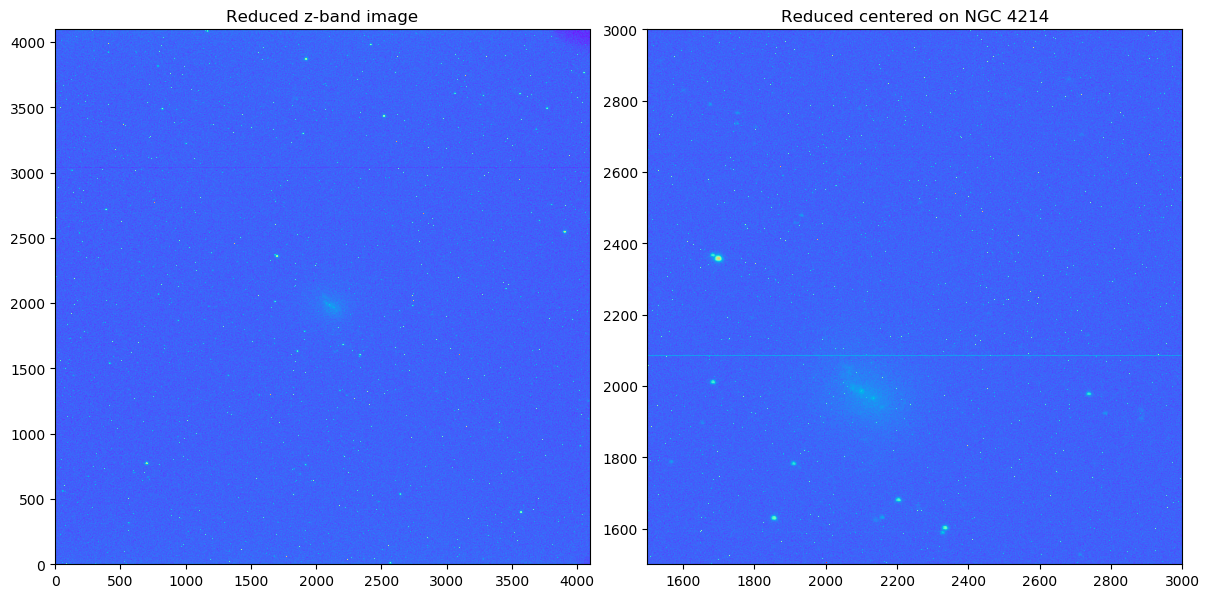

In [47]:
fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,6)

fig.tight_layout()

ax[1].axis((1500,3000,1500,3000))

ax[0].imshow(reduced_z_NGC4214, norm=LogNorm(), origin='lower', cmap='rainbow')
ax[1].imshow(reduced_z_NGC4214, norm=LogNorm(), origin='lower', cmap='rainbow')

ax[0].set_title('Reduced z-band image')
ax[1].set_title('Reduced centered on NGC 4214');

In [48]:
# H alpha:

halpha_avg_flats_minusbias = domeflatdata_array[0] - super_bias

n2_domeflatnorm_halpha = halpha_avg_flats_minusbias/np.linalg.norm(halpha_avg_flats_minusbias)

reduced_halpha_NGC4214 = (data_array[0] - super_bias)/(n2_domeflatnorm_halpha)

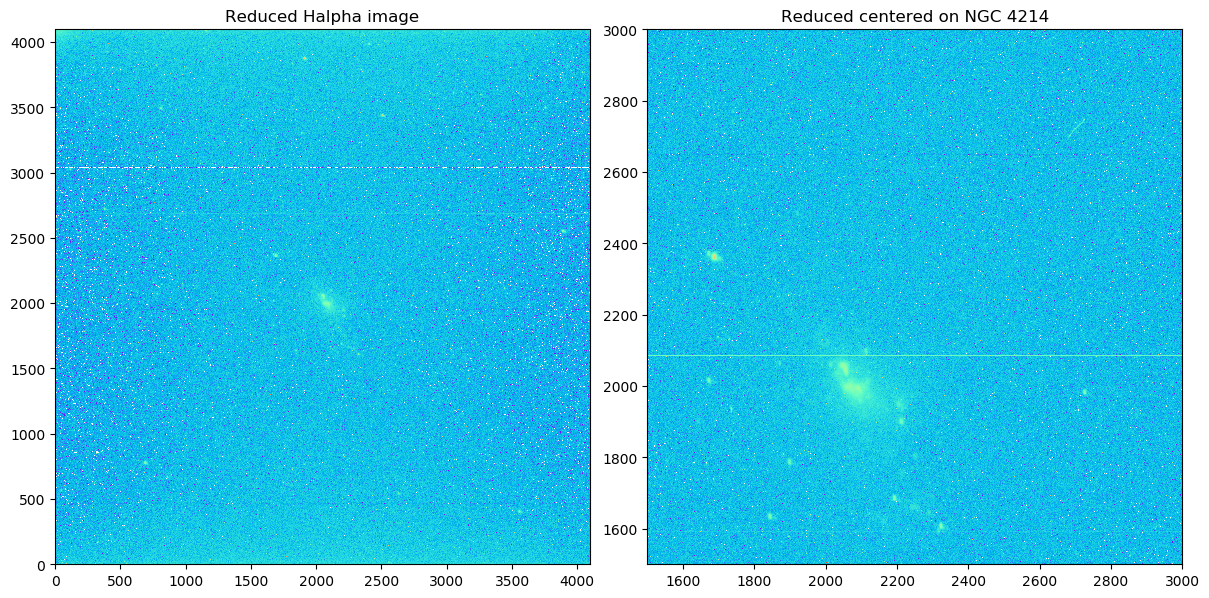

In [49]:
fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,6)

fig.tight_layout()

ax[1].axis((1500,3000,1500,3000))

ax[0].imshow(reduced_halpha_NGC4214, norm=LogNorm(), origin='lower', cmap='rainbow')
ax[1].imshow(reduced_halpha_NGC4214, norm=LogNorm(), origin='lower', cmap='rainbow')

ax[0].set_title('Reduced Halpha image')
ax[1].set_title('Reduced centered on NGC 4214');

# Now for sky-subtraction:

In [50]:
coord = [2051.134, 2053.268]

In [54]:
ApertureScience = EllipticalAperture(coord, a=300, b=150, theta=2.0)

In [55]:
ap_pho = aperture_photometry(reduced_g_NGC4214, ApertureScience, method='exact')
ap_pho

<QTable length=1>
  id  xcenter  ycenter     aperture_sum  
        pix      pix                     
int64 float64  float64       float64     
----- -------- -------- -----------------
    1 2051.134 2053.268 69174356617.41353

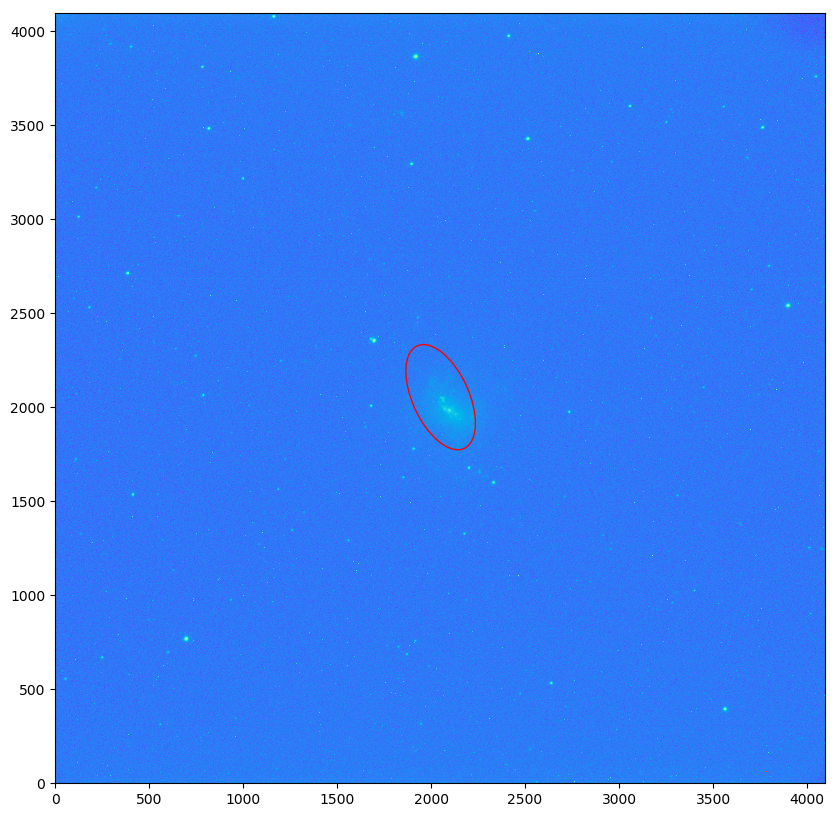

In [56]:
fig,ax = plt.subplots(1,1)                 
fig.set_size_inches(10,10)
fig.set_tight_layout

plt.imshow(reduced_g_NGC4214, norm=LogNorm(), alpha=1.0, cmap='rainbow', origin='lower')
EllipticalAperture.plot(ApertureScience, color="r");

In [57]:
count = []

count_a = ap_pho['aperture_sum']
count_per_area = (count_a / (ApertureScience.area())) # counts / pixel squared
count.append(count_per_area)
print(count)

[<Column name='aperture_sum' dtype='float64' length=1>
489308.4795939077]


In [307]:
# That can't be right.

In [58]:
coord2 = [3318.906, 1504.755]

In [83]:
Elliptical_Annulus_Science = EllipticalAnnulus(coord2, a_in=0.82, a_out=1.0, b_out=1.0, theta=0)

In [84]:
ell_ann_phot = aperture_photometry(reduced_g_NGC4214, Elliptical_Annulus_Science, method='exact')
print(ell_ann_phot, Elliptical_Annulus_Science.area()) # no...

 id xcenter  ycenter     aperture_sum   
      pix      pix                      
--- -------- -------- ------------------
  1 3318.906 1504.755 281455.33372504934 1.0291857533160165


# To be continued once this elliptical aperture and annuli business is sorted out.